In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [29]:
raw_df = pd.read_csv("./CSVFiles/Raw_Data.csv", index_col='SEQN')

C:\Users\jirap\AppData\Local\Temp\ipykernel_18944\260932202.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("./CSVFiles/Raw_Data.csv", index_col='SEQN')


In [30]:
raw_df.shape

(36259, 491)

In [31]:
desired_stats = raw_df.describe().loc[['mean', 'std', '25%', '50%', '75%']]
pd.set_option('display.max_columns', None)
print(desired_stats)

        gender        age  education_level  household_size  household_income  \
mean  0.508756  47.786260         3.209107        3.206349          6.919358   
std   0.499930  18.763978         1.464932        1.677450          3.523153   
25%   0.000000  31.000000         2.000000        2.000000          4.000000   
50%   1.000000  47.000000         3.000000        3.000000          7.000000   
75%   1.000000  63.000000         4.000000        4.000000         10.000000   

        asthma  asthma_onset  asthma_currently  asthma_emergency    anemia  \
mean  0.147743      3.142365          0.085965          0.013762  0.042196   
std   0.354850     10.763107          0.280316          0.116504  0.201040   
25%   0.000000      0.000000          0.000000          0.000000  0.000000   
50%   0.000000      0.000000          0.000000          0.000000  0.000000   
75%   0.000000      0.000000          0.000000          0.000000  0.000000   

      ever_overweight  blood_transfusion  arthriti

# Find Duplicate Row

In [32]:
duplicate_count = np.sum(raw_df.duplicated())

print(f'Total number of duplicate rows: {duplicate_count}')

Total number of duplicate rows: 0


# Check NA Value

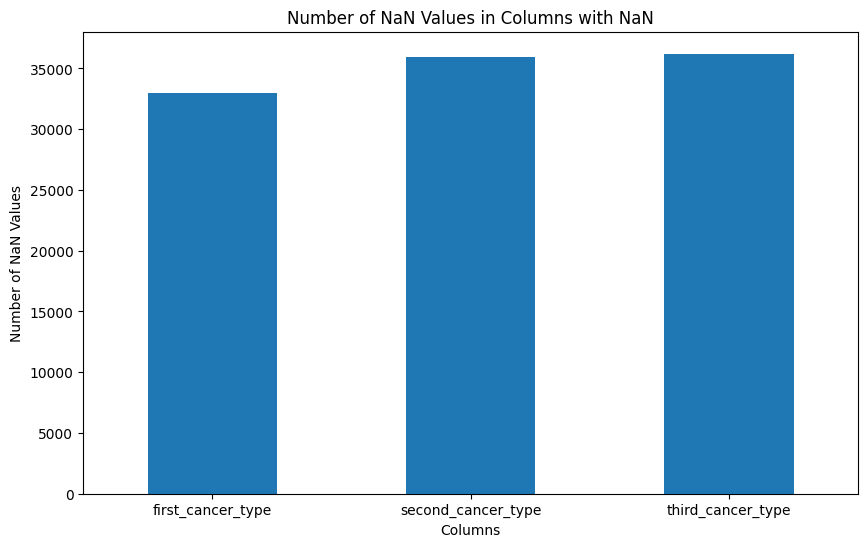

In [33]:
nan_count_per_column = raw_df.isna().sum()

columns_with_nan = []
for column_name, nan_count in nan_count_per_column.items():
    if nan_count > 0:
        columns_with_nan.append(column_name)

if columns_with_nan:
    raw_df[columns_with_nan].isna().sum().plot(kind='bar', figsize=(10, 6))
    plt.title('Number of NaN Values in Columns with NaN')
    plt.xlabel('Columns')
    plt.ylabel('Number of NaN Values')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No columns with NaN values.")

In [34]:
df_withoutNa = raw_df.dropna(axis=1)

In [35]:
nan_count_per_column = df_withoutNa.isna().sum()

columns_with_nan = []
for column_name, nan_count in nan_count_per_column.items():
    if nan_count > 0:
        columns_with_nan.append(column_name)

if columns_with_nan:
    df_withoutNa[columns_with_nan].isna().sum().plot(kind='bar', figsize=(10, 6))
    plt.title('Number of NaN Values in Columns with NaN')
    plt.xlabel('Columns')
    plt.ylabel('Number of NaN Values')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No columns with NaN values.")

No columns with NaN values.


# Outlier

In [36]:

# def drop_rows_with_outliers(data, col):
#     rows_dropped = 0

#     for column in col:
#         # Calculate standard deviation
#         std = data[column].std()

#         # Define the lower and upper bounds for outliers
#         lower_bound = -3 * std
#         upper_bound = 3 * std

#         # Identify rows with outliers
#         outlier_rows = (data[column] < lower_bound) | (data[column] > upper_bound)

#         # Drop rows with outliers and update the count
#         rows_dropped += outlier_rows.sum()
#         data = data[~outlier_rows]

#     print(f"Number of rows dropped: {rows_dropped}")
#     return data

# numeric_columns = df_withoutNa.select_dtypes(include=['number']).columns
# df_without_Outlier = drop_rows_with_outliers(df_withoutNa, numeric_columns)


In [37]:
# df_without_Outlier.shape

# Corr

<Axes: >

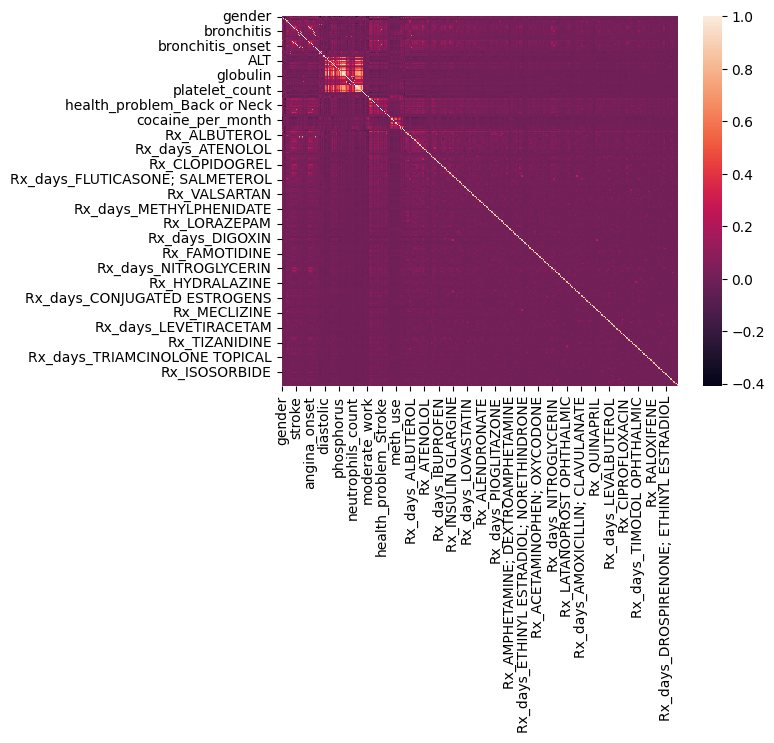

In [38]:
# Before Drop
numeric_columns = df_withoutNa.select_dtypes(include=['number']).columns
correlation_matrix = df_withoutNa[numeric_columns].corr()
sns.heatmap(correlation_matrix)

In [39]:
# drop corr > 0.8

numeric_columns = df_withoutNa.select_dtypes(include=['number']).columns
# Cal corr
correlation_matrix = df_withoutNa[numeric_columns].corr()

# Get upper triangle corr matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find col with corr > 0.8
high_correlation_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

print(f"Columns to drop: {high_correlation_cols}")


Columns to drop: ['thyroid_problem_currently', 'arthritis_onset', 'heart_failure_onset', 'heart_disease_onset', 'angina_onset', 'heart_attack_onset', 'stroke_onset', 'emphysema_onset', 'bronchitis_onset', 'liver_condition_onset', 'thyroid_problem_onset', 'first_cancer_count', 'BMI', 'diastolic', 'calcium', 'CO2', 'phosphorus', 'total_protein', 'sodium', 'potassium', 'chloride', 'osmolality', 'globulin', 'eosinophils_count', 'hemoglobin', 'hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'MPV', 'cocaine_number_uses', 'meth_number_uses', 'Rx_LEVOTHYROXINE']


In [40]:
# drop high corr
df_without_Corr = df_withoutNa.drop(high_correlation_cols, axis=1)

In [41]:
df_without_Corr.shape

(36259, 454)

<Axes: >

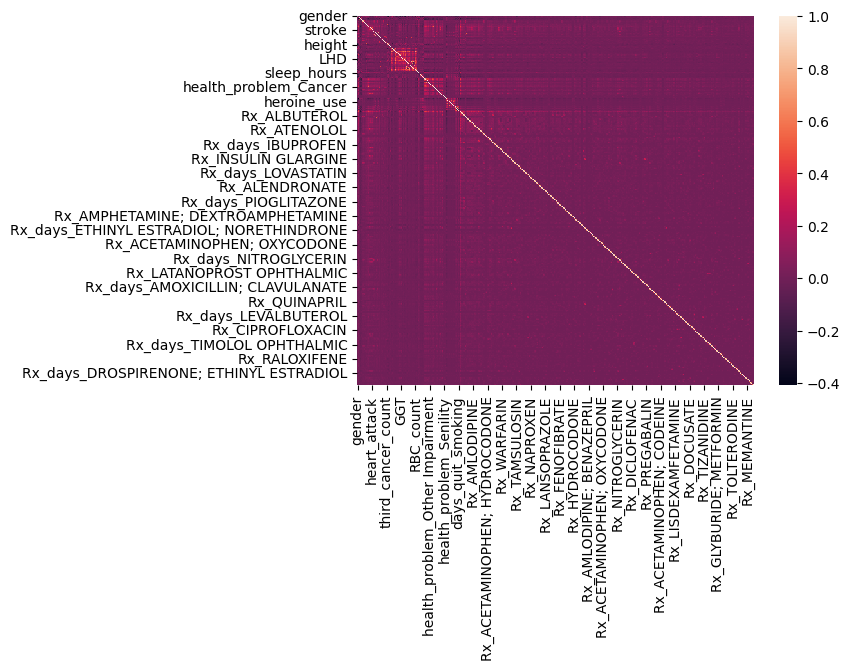

In [42]:
numeric_columns = df_without_Corr.select_dtypes(include=['number']).columns
correlation_matrix = df_without_Corr[numeric_columns].corr()
sns.heatmap(correlation_matrix)

# Split X Y

In [43]:
x = df_without_Corr.drop('depression', axis=1)
y = df_without_Corr['depression'].map({'Not Depressed': 0, 'Depressed': 1})

In [44]:
print(x.shape)
print(y.shape)

(36259, 453)
(36259,)


# Label Encode

In [18]:
non_numeric_columns = x.select_dtypes(exclude=['number']).columns

if not non_numeric_columns.empty:
    label_encoder = LabelEncoder()

    for column in non_numeric_columns:
        x[column] = label_encoder.fit_transform(x[column])
else:
    print("All columns contain numeric data.")

In [19]:
x.describe()

,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,hay_fever,cancer_onset,arthritis_type,second_cancer_count,third_cancer_count,weight,height,pulse,irregular_pulse,systolic,total_cholesterol,HDL,triglyceride,LDL,albumin,ALT,AST,ALP,BUN,creatinine,GGT,glucose,iron,LHD,bilirubin,uric_acid,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,basophils_count,RBC_count,platelet_count,full_time_work,work_type,time_in_current_job,out_of_work,trouble_sleeping_history,sleep_hours,vigorous_recreation,moderate_recreation,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,lifetime_alcohol_consumption,drinks_past_year,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers,prescriptions_count,Rx_LISINOPRIL,Rx_days_LISINOPRIL,Rx_METFORMIN,Rx_days_METFORMIN,Rx_ALBUTEROL,Rx_days_ALBUTEROL,Rx_days_LEVOTHYROXINE,Rx_SIMVASTATIN,Rx_days_SIMVASTATIN,Rx_ATORVASTATIN,Rx_days_ATORVASTATIN,Rx_METOPROLOL,Rx_days_METOPROLOL,Rx_AMLODIPINE,Rx_days_AMLODIPINE,Rx_OMEPRAZOLE,Rx_days_OMEPRAZOLE,Rx_HYDROCHLOROTHIAZIDE,Rx_days_HYDROCHLOROTHIAZIDE,Rx_FUROSEMIDE,Rx_days_FUROSEMIDE,Rx_ATENOLOL,Rx_days_ATENOLOL,Rx_LOSARTAN,Rx_days_LOSARTAN,Rx_MONTELUKAST,Rx_days_MONTELUKAST,Rx_AMOXICILLIN,Rx_days_AMOXICILLIN,Rx_ACETAMINOPHEN; HYDROCODONE,Rx_days_ACETAMINOPHEN; HYDROCODONE,Rx_GABAPENTIN,Rx_days_GABAPENTIN,Rx_POTASSIUM CHLORIDE,Rx_days_POTASSIUM CHLORIDE,Rx_GLIPIZIDE,Rx_days_GLIPIZIDE,Rx_IBUPROFEN,Rx_days_IBUPROFEN,Rx_RANITIDINE,Rx_days_RANITIDINE,Rx_CLOPIDOGREL,Rx_days_CLOPIDOGREL,Rx_PRAVASTATIN,Rx_days_PRAVASTATIN,Rx_WARFARIN,Rx_days_WARFARIN,Rx_ESOMEPRAZOLE,Rx_days_ESOMEPRAZOLE,Rx_FLUTICASONE NASAL,Rx_days_FLUTICASONE NASAL,Rx_CARVEDILOL,Rx_days_CARVEDILOL,Rx_ROSUVASTATIN,Rx_days_ROSUVASTATIN,Rx_INSULIN GLARGINE,Rx_days_INSULIN GLARGINE,Rx_CETIRIZINE,Rx_days_CETIRIZINE,Rx_FLUTICASONE; SALMETEROL,Rx_days_FLUTICASONE; SALMETEROL,Rx_TAMSULOSIN,Rx_days_TAMSULOSIN,Rx_PANTOPRAZOLE,Rx_days_PANTOPRAZOLE,Rx_TRAMADOL,Rx_days_TRAMADOL,Rx_ALPRAZOLAM,Rx_days_ALPRAZOLAM,Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL,Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL,Rx_LOVASTATIN,Rx_days_LOVASTATIN,Rx_PREDNISONE,Rx_days_PREDNISONE,Rx_ALLOPURINOL,Rx_days_ALLOPURINOL,Rx_NAPROXEN,Rx_days_NAPROXEN,Rx_VALSARTAN,Rx_days_VALSARTAN,Rx_ASPIRIN,Rx_days_ASPIRIN,Rx_ZOLPIDEM,Rx_days_ZOLPIDEM,Rx_CYCLOBENZAPRINE,Rx_days_CYCLOBENZAPRINE,Rx_DILTIAZEM,Rx_days_DILTIAZEM,Rx_ALENDRONATE,Rx_days_ALENDRONATE,Rx_CLONIDINE,Rx_days_CLONIDINE,Rx_LANSOPRAZOLE,Rx_days_LANSOPRAZOLE,Rx_MELOXICAM,Rx_days_MELOXICAM,Rx_METHYLPHENIDATE,Rx_days_METHYLPHENIDATE,Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE,Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE,Rx_GLIMEPIRIDE,Rx_days_GLIMEPIRIDE,Rx_CLONAZEPAM,Rx_days_CLONAZEPAM,Rx_PIOGLITAZONE,Rx_days_PIOGLITAZONE,Rx_ENALAPRIL,Rx_da

# Standard Scaler

In [20]:
standardize_scaler = StandardScaler()

for column in x.columns: 
    column_values = x[column].values.reshape(-1, 1)
    standardized_values = standardize_scaler.fit_transform(column_values)
    x[column] = standardized_values[:, 0]



In [21]:
x.describe()

,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,hay_fever,cancer_onset,arthritis_type,second_cancer_count,third_cancer_count,weight,height,pulse,irregular_pulse,systolic,total_cholesterol,HDL,triglyceride,LDL,albumin,ALT,AST,ALP,BUN,creatinine,GGT,glucose,iron,LHD,bilirubin,uric_acid,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,basophils_count,RBC_count,platelet_count,full_time_work,work_type,time_in_current_job,out_of_work,trouble_sleeping_history,sleep_hours,vigorous_recreation,moderate_recreation,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,lifetime_alcohol_consumption,drinks_past_year,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers,prescriptions_count,Rx_LISINOPRIL,Rx_days_LISINOPRIL,Rx_METFORMIN,Rx_days_METFORMIN,Rx_ALBUTEROL,Rx_days_ALBUTEROL,Rx_days_LEVOTHYROXINE,Rx_SIMVASTATIN,Rx_days_SIMVASTATIN,Rx_ATORVASTATIN,Rx_days_ATORVASTATIN,Rx_METOPROLOL,Rx_days_METOPROLOL,Rx_AMLODIPINE,Rx_days_AMLODIPINE,Rx_OMEPRAZOLE,Rx_days_OMEPRAZOLE,Rx_HYDROCHLOROTHIAZIDE,Rx_days_HYDROCHLOROTHIAZIDE,Rx_FUROSEMIDE,Rx_days_FUROSEMIDE,Rx_ATENOLOL,Rx_days_ATENOLOL,Rx_LOSARTAN,Rx_days_LOSARTAN,Rx_MONTELUKAST,Rx_days_MONTELUKAST,Rx_AMOXICILLIN,Rx_days_AMOXICILLIN,Rx_ACETAMINOPHEN; HYDROCODONE,Rx_days_ACETAMINOPHEN; HYDROCODONE,Rx_GABAPENTIN,Rx_days_GABAPENTIN,Rx_POTASSIUM CHLORIDE,Rx_days_POTASSIUM CHLORIDE,Rx_GLIPIZIDE,Rx_days_GLIPIZIDE,Rx_IBUPROFEN,Rx_days_IBUPROFEN,Rx_RANITIDINE,Rx_days_RANITIDINE,Rx_CLOPIDOGREL,Rx_days_CLOPIDOGREL,Rx_PRAVASTATIN,Rx_days_PRAVASTATIN,Rx_WARFARIN,Rx_days_WARFARIN,Rx_ESOMEPRAZOLE,Rx_days_ESOMEPRAZOLE,Rx_FLUTICASONE NASAL,Rx_days_FLUTICASONE NASAL,Rx_CARVEDILOL,Rx_days_CARVEDILOL,Rx_ROSUVASTATIN,Rx_days_ROSUVASTATIN,Rx_INSULIN GLARGINE,Rx_days_INSULIN GLARGINE,Rx_CETIRIZINE,Rx_days_CETIRIZINE,Rx_FLUTICASONE; SALMETEROL,Rx_days_FLUTICASONE; SALMETEROL,Rx_TAMSULOSIN,Rx_days_TAMSULOSIN,Rx_PANTOPRAZOLE,Rx_days_PANTOPRAZOLE,Rx_TRAMADOL,Rx_days_TRAMADOL,Rx_ALPRAZOLAM,Rx_days_ALPRAZOLAM,Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL,Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL,Rx_LOVASTATIN,Rx_days_LOVASTATIN,Rx_PREDNISONE,Rx_days_PREDNISONE,Rx_ALLOPURINOL,Rx_days_ALLOPURINOL,Rx_NAPROXEN,Rx_days_NAPROXEN,Rx_VALSARTAN,Rx_days_VALSARTAN,Rx_ASPIRIN,Rx_days_ASPIRIN,Rx_ZOLPIDEM,Rx_days_ZOLPIDEM,Rx_CYCLOBENZAPRINE,Rx_days_CYCLOBENZAPRINE,Rx_DILTIAZEM,Rx_days_DILTIAZEM,Rx_ALENDRONATE,Rx_days_ALENDRONATE,Rx_CLONIDINE,Rx_days_CLONIDINE,Rx_LANSOPRAZOLE,Rx_days_LANSOPRAZOLE,Rx_MELOXICAM,Rx_days_MELOXICAM,Rx_METHYLPHENIDATE,Rx_days_METHYLPHENIDATE,Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE,Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE,Rx_GLIMEPIRIDE,Rx_days_GLIMEPIRIDE,Rx_CLONAZEPAM,Rx_days_CLONAZEPAM,Rx_PIOGLITAZONE,Rx_days_PIOGLITAZONE,Rx_ENALAPRIL,Rx_da

# train test split

In [45]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=123, stratify=y)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29007, 453)
(7252, 453)
(29007,)
(7252,)


In [24]:
# Checking target value counts
# Not Depressed: 0
# Depressed: 1
y_train.value_counts(1)

depression
0    0.912642
1    0.087358
Name: proportion, dtype: float64

In [25]:
# Checking target value counts
# Not Depressed: 0
# Depressed: 1
y_test.value_counts(1)

depression
0    0.912576
1    0.087424
Name: proportion, dtype: float64

# Save Data

In [26]:
# Save DataFrames to CSV files
# x_train.to_csv('X_train.csv')
# x_test.to_csv('X_test.csv')
# y_train.to_csv('Y_train.csv')
# y_test.to_csv('Y_test.csv')